In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
train = pd.read_csv('train.csv')
uniq = pd.read_csv('unique_m.csv')

In [3]:
tcols = train.columns

In [4]:
ucols = uniq.columns

In [29]:
#check if uniq and train have same columns
for i in tcols:
    if i in ucols:
        print(i)

print("Please, work")


critical_temp
Please, work


In [6]:
#get the index where there are columns with NA values
train.isnull().any()


number_of_elements       False
mean_atomic_mass         False
wtd_mean_atomic_mass     False
gmean_atomic_mass        False
wtd_gmean_atomic_mass    False
                         ...  
range_Valence            False
wtd_range_Valence        False
std_Valence              False
wtd_std_Valence          False
critical_temp            False
Length: 82, dtype: bool

In [7]:
#merge the two dataframes on the index  
train.drop('critical_temp', axis=1, inplace=True)
df = pd.merge(train, uniq, left_index=True, right_index=True)

In [8]:
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [9]:
df.shape

(21263, 169)

In [10]:
#prepare the categorical data
df = pd.get_dummies(df, columns=['number_of_elements'])


In [11]:
#check if all the values in the material column are unique
df['material'].is_unique


False

In [12]:
#return a list of duplicate values in the material column
df['material'].duplicated().sum()

duplicates = df[df['material'].duplicated()]['material'].tolist()


In [13]:
X = df.drop("critical_temp", axis=1).copy()
y = df["critical_temp"].copy()

In [14]:
#what variables in X are categorical
data_types = X.dtypes.to_list()


In [15]:
vals, counts= np.unique(data_types, return_counts=True)
print("Data types in X")
for v, c in zip(vals, counts):
    print("# of ",v, "--->", c)

Data types in X
# of  uint8 ---> 9
# of  int64 ---> 11
# of  float64 ---> 155
# of  object ---> 1


In [16]:
#drop the material column
X.drop('material', axis=1, inplace=True)

In [17]:
#convert y into categorical values
bins = [0.0, 1.0, 5.0, 20.0, 100.0, float('inf')]
labels = ['VeryLow', 'Low', 'Medium', 'High', 'VeryHigh']
y = pd.cut(y, bins=bins, labels=labels)

In [18]:
vals, counts= np.unique(y, return_counts=True)
print("0 - VeryLow, 1 - Low, 2 - Medium, 3 - High, 4 - VeryHigh")
for v, c in zip(vals, counts):
    print("# of ",v, "--->", c)

0 - VeryLow, 1 - Low, 2 - Medium, 3 - High, 4 - VeryHigh
# of  High ---> 9779
# of  Low ---> 4057
# of  Medium ---> 5623
# of  VeryHigh ---> 768
# of  VeryLow ---> 1036


In [19]:
# calculate the proportion of each class in the dataset
total_samples = 20563
class_very_low = 1036 / total_samples
class_low = 4057 / total_samples
class_medium = 5623 / total_samples
class_high = 9779 / total_samples
class_very_high = 768 / total_samples

# set the prior probabilities for each class
prior_sum = class_very_low + class_low + class_medium + class_high + class_very_high
class_prior = [class_very_low/prior_sum, class_low/prior_sum, class_medium/prior_sum, 
               class_high/prior_sum, class_very_high/prior_sum]


In [20]:
from sklearn.metrics import f1_score, matthews_corrcoef, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

def class_stats(truth, preds):
    print("F1:", f1_score(truth, preds, average='weighted'))
    print("MCC:", matthews_corrcoef(truth, preds))
    cm = confusion_matrix(truth, preds, labels=['VeryLow', 'Low', 'Medium', 'High', 'VeryHigh'])
    print("Confusion Matrix:")
    print(cm)


In [21]:
def train_val_test_split(x, y):
    X_train, X_, y_train, y_ = train_test_split(x, y, train_size=0.8)
    X_val, X_test, y_val, y_test = train_test_split(X_, y_, train_size=0.5)
    return X_train, X_val, X_test, y_train, y_val, y_test


X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y)


print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}\n")

print (f"Sample point: {X_train.head(1).to_numpy()} → {y_train[0]}")

X_train: (17010, 175), y_train: (17010,)
X_val: (2126, 175), y_val: (2126,)
X_test: (2127, 175), y_test: (2127,)

Sample point: [[9.15080800e+01 5.46270750e+01 6.45702746e+01 3.56129513e+01
  1.32746465e+00 1.53412043e+00 1.84590600e+02 1.21561250e+01
  6.80098971e+01 5.45335342e+01 8.31200000e+02 9.95600000e+02
  7.81483208e+02 9.31716637e+02 1.54798879e+00 1.09155521e+00
  8.10600000e+02 5.93737500e+02 2.95541544e+02 3.36456845e+02
  1.62200000e+02 1.17750000e+02 1.42332973e+02 9.37140393e+01
  1.50889625e+00 1.55891023e+00 2.05000000e+02 2.09375000e+01
  6.73361716e+01 7.59098972e+01 5.51108580e+03 3.15908950e+03
  9.88282363e+02 8.29359557e+01 1.13937944e+00 1.13591935e+00
  1.35325710e+04 1.67928550e+03 5.02619189e+03 4.28501480e+03
  5.66440000e+01 9.62400000e+01 1.72612782e+01 5.00923797e+01
  9.54578305e-01 6.74064213e-01 1.41000000e+02 7.11562500e+01
  6.14743454e+01 6.01526377e+01 6.43040000e+00 4.77787500e+00
  3.40095998e+00 1.36292844e+00 1.28658974e+00 1.19672813e+00
  1.

In [22]:
#import decision tree and naive bayes
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#initialize the models
dt = DecisionTreeClassifier()
nb = GaussianNB()
nb_prior = GaussianNB(priors=class_prior)


#fit the models
dt.fit(X_train, y_train)
nb.fit(X_train, y_train)
nb_prior.fit(X_train, y_train)


#predict the values
y_pred_dt = dt.predict(X_val)
y_pred_nb = nb.predict(X_val)
y_pred_nb_prior = nb_prior.predict(X_val)



In [23]:
#check the accuracy of the models
from sklearn.metrics import accuracy_score

print("Decision Tree Accuracy: ", accuracy_score(y_val, y_pred_dt))
print("Naive Bayes Accuracy: ", accuracy_score(y_val, y_pred_nb))
print("Naive Bayes Accuracy with Prior: ", accuracy_score(y_val, y_pred_nb_prior))

Decision Tree Accuracy:  0.834901222953904
Naive Bayes Accuracy:  0.5
Naive Bayes Accuracy with Prior:  0.49106302916274697


In [24]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, 25, 35, 50],
    'min_samples_split': [1, 2, 5, 20, 30],
    'min_samples_leaf': [1, 2, 5, 10]
}

grid_search = GridSearchCV(estimator = dt, param_grid = param_grid,
                            cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

grid_search.best_params_

#predict the values
y_pred_dt = grid_search.predict(X_val)

#check the accuracy of the models
print("Decision Tree Accuracy: ", accuracy_score(y_val, y_pred_dt))

Fitting 3 folds for each of 280 candidates, totalling 840 fits
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=1; total time=   0.7s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=1; total time=   0.7s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.5s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=1; total time=   0.7s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   0.7s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.7s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   0.7s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.7s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   0.5s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=

In [25]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 1}

In [26]:
report = pd.DataFrame(classification_report(y_val, y_pred_dt, output_dict=True, labels=labels)).transpose()
report

,precision,recall,f1-score,support
VeryLow,0.782609,0.595041,0.676056,121.000000
Low,0.789976,0.805353,0.797590,411.000000
Medium,0.770073,0.758993,0.764493,556.000000
High,0.888442,0.921794,0.904811,959.000000
VeryHigh,0.777778,0.708861,0.741722,79.000000
accuracy,0.830198,0.830198,0.830198,0.830198
macro avg,0.801776,0.758008,0.776934,2126.000000
weighted avg,0.828315,0.830198,0.828307,2126.000000


<Axes: >

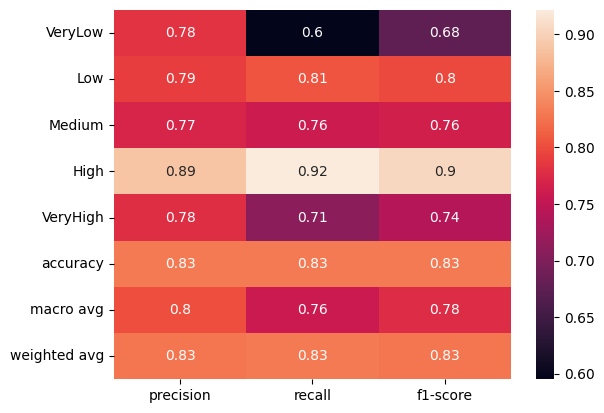

In [27]:
import seaborn as sns

# .iloc[:-1, :] to exclude support
hm = sns.heatmap(report.iloc[:, :-1], annot=True)
hm

In [28]:
class_stats(y_val, y_pred_dt)

F1: 0.8283066139949314
MCC: 0.7504831387270945
Confusion Matrix:
[[ 72  32  14   3   0]
 [ 16 331  57   7   0]
 [  4  50 422  80   0]
 [  0   5  54 884  16]
 [  0   1   1  21  56]]
